# Exploring Dandiset 001366: Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification

*Generated with the assistance of AI. Please review all code, outputs, and interpretations carefully before relying on them for further research.*

## Overview

This notebook provides an introduction to [Dandiset 001366 version 0.250324.1603](https://dandiarchive.org/dandiset/001366/0.250324.1603):  
**"Comparison of Approaches for Surface Vessel Diameter and Pulsatility Quantification"**

The Dandiset contains 16-bit grayscale movies of pial vessels in mice, recorded under experimental setups for measuring vessel diameter and pulsatility. These datasets enable comparison of image analysis methods, including the use of full width at half maximum and Radon transforms.

**Keywords:** vessel diameter, radon transform, vessel pulsation, image analysis, full width at half maximum

**Main contributors:**  
- Aditya Ranjan, Devin T. Wong, Qinwen Huang, Hashmat Ghanizada, Maiken Nedergaard, Douglas H. Kelley, Kimberly A. S. Boster

## What This Notebook Covers

- Lists required packages for exploration.
- Loads Dandiset assets remotely using the DANDI API.
- Loads and explores NWB imaging data directly from the DANDI server (without downloading).
- Extracts and visualizes relevant imaging data, plus useful NWB metadata.

This notebook is intended as a starting point for further analysis. It focuses on code patterns seen in the current Dandiset and avoids use of additional features or methods.

## Required Packages

- `dandi` (DANDI API client)
- `remfile` (random-access reading of remote files)
- `h5py` (accessing HDF5/NWB file content)
- `pynwb` (Neurodata Without Borders I/O)
- `matplotlib` (visualizations)
- `numpy` (array manipulation)

**Note:** This notebook assumes all packages are already installed in your environment.

In [1]:
# Import required packages
from dandi.dandiapi import DandiAPIClient
import remfile
import h5py
import pynwb
import numpy as np
import matplotlib.pyplot as plt

## Connecting to the Dandiset and Listing Assets

You can programmatically access the Dandiset and its files using the DANDI API. Here, we connect to the Dandiset and list available NWB image assets.

In [2]:
# Connect to the Dandiset and list NWB image files
dandiset_id = "001366"
dandiset_version = "0.250324.1603"

client = DandiAPIClient()
dandiset = client.get_dandiset(dandiset_id, dandiset_version)

# List NWB files in the dandiset
print("Available NWB assets:")
for asset in dandiset.get_assets():
    if asset.path.endswith(".nwb") and "_image" in asset.path:
        print(asset.path)

Available NWB assets:


sub-F15/sub-F15_ses-F15BC-19102023_image.nwb
sub-031224-M4/sub-031224-M4_ses-03122024-m4-baseline_image.nwb


## Loading a Remote NWB File

In this example, we focus on one asset:  
`sub-F15/sub-F15_ses-F15BC-19102023_image.nwb`

We load the file for analysis by streaming it from the DANDI server—**no download required**.

In [3]:
# Specify the asset path (change as desired)
asset_path = "sub-F15/sub-F15_ses-F15BC-19102023_image.nwb"

# Get a streaming URL for the asset
asset = next(dandiset.get_assets_by_glob(asset_path))
url = asset.download_url

# Open the file remotely
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)

# Use NWBHDF5IO to read the NWB data
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.5.0 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-experimental' version 0.1.0 because version 0.5.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Exploring NWB Metadata

Let's extract and display some key metadata from the session and subject.

In [4]:
# Session-level metadata
print("NWB Identifier:", nwb.identifier)
print("Session Description:", nwb.session_description)
print("Session Start:", nwb.session_start_time)
print("Institution:", nwb.institution)
print("Experiment Description:", nwb.experiment_description)
print("Keywords:", nwb.keywords[:])
print("Experimenter(s):", nwb.experimenter)

# Subject-specific metadata
subject = nwb.subject
print("\nSubject ID:", subject.subject_id)
print("Species:", subject.species)
print("Strain:", subject.strain)
print("Sex:", subject.sex)
print("Age:", subject.age)
print("Description:", subject.description)

NWB Identifier: 202309_Hashmat-OCT.2023-F15BC-19102023
Session Description: a wild-type mouse skull was thinned at the area of the middle cerebral artery (MCA) and fitted with a head plate for fixation.
Session Start: 2023-10-19 02:00:00-04:00
Institution: University of Copenhagen
Experiment Description: Vessel diameter and pulsatility measurement.
Keywords: ['Vessel diameter, Radon transform, full width at half maximum, vessel pulsation, image analysis']
Experimenter(s): ('Ghanizada, Hashmat ',)

Subject ID: F15
Species: Mus musculus
Strain: C57BL/6J
Sex: F
Age: P9W/P16W
Description: wild-type mouse


## Accessing Movie Data

The NWB file acquisition group contains the image data as an `ImageSeries` object called `"Movies"`.  
Let's examine its properties and data shape.

In [5]:
# Access image data
Movies = nwb.acquisition["Movies"]

print("ImageSeries description:", Movies.description)
print("Comments:", Movies.comments)
print("Frame rate (Hz):", Movies.rate)
print("Dimensions (frames, y, x):", Movies.data.shape)
print("Data type:", Movies.data.dtype)

ImageSeries description: 16-bit grayscale movie of a pial vessel
Comments: no comments
Frame rate (Hz): 54.47
Dimensions (frames, y, x): (9553, 214, 132)
Data type: uint16


## Visualizing a Representative Frame

Let's plot the first frame (t=0) of the vessel movie.

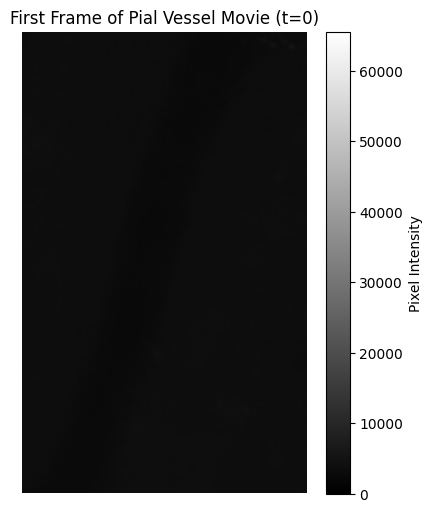

In [6]:
# Extract and plot the first frame
frame0 = Movies.data[0, :, :]

plt.figure(figsize=(5, 6))
plt.imshow(frame0, cmap='gray', vmin=0, vmax=2**16-1)
plt.title("First Frame of Pial Vessel Movie (t=0)")
plt.axis('off')
plt.colorbar(label='Pixel Intensity')
plt.show()

## Visualizing Motion: Mean Intensity Over Time

To get a sense for the movie's dynamics (perhaps reflecting pulsations), we can plot the mean intensity of each frame over time.

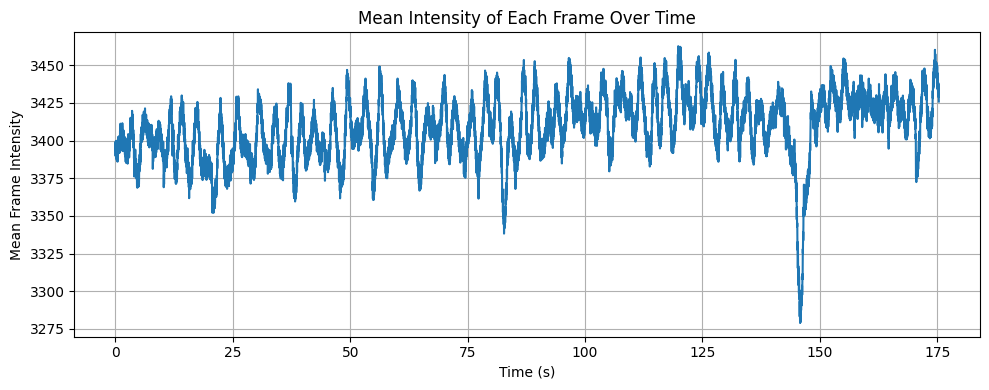

In [7]:
# Compute and plot the mean intensity per frame
mean_intensity = [np.mean(Movies.data[i, :, :]) for i in range(Movies.data.shape[0])]

times = np.arange(len(mean_intensity)) / Movies.rate  # in seconds

plt.figure(figsize=(10, 4))
plt.plot(times, mean_intensity)
plt.xlabel("Time (s)")
plt.ylabel("Mean Frame Intensity")
plt.title("Mean Intensity of Each Frame Over Time")
plt.grid(True)
plt.tight_layout()
plt.show()

## Visualizing a Kymograph (Line Profile Over Time)

A kymograph reveals dynamics along a cross-section of the vessel over time.  
Below, we extract a horizontal line segment near the vessel center across all frames and display it as an image.

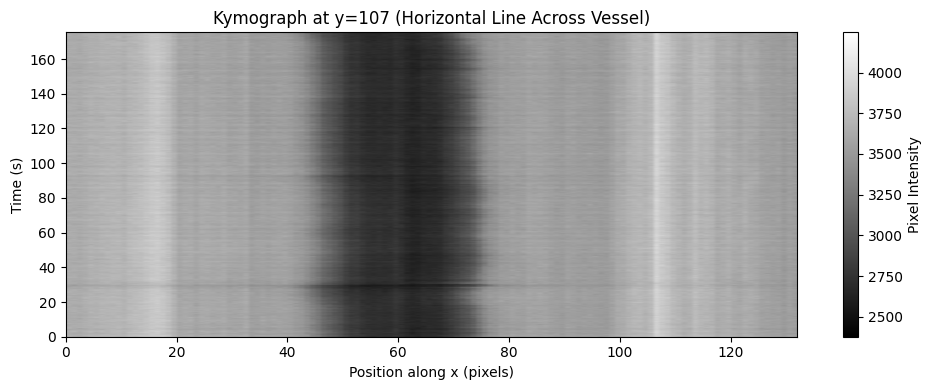

In [8]:
# Choose a representative line (e.g., center row)
y_center = Movies.data.shape[1] // 2
kymograph = Movies.data[:, y_center, :]

plt.figure(figsize=(10, 4))
plt.imshow(kymograph, aspect='auto', cmap='gray',
           extent=[0, Movies.data.shape[2], 0, Movies.data.shape[0]/Movies.rate])
plt.xlabel("Position along x (pixels)")
plt.ylabel("Time (s)")
plt.title(f"Kymograph at y={y_center} (Horizontal Line Across Vessel)")
plt.colorbar(label='Pixel Intensity')
plt.tight_layout()
plt.show()

## Next Steps

- Explore other assets in the Dandiset using the same approach.
- Apply vessel segmentation, diameter measurement, or pulsatility quantification methods.
- Refer to Dandiset documentation and related publication for further guidance.

*For more details and context, visit the [Dandiset page](https://dandiarchive.org/dandiset/001366/0.250324.1603).*